# Step 1: Load the COVID-19 Dataset

We’ll be using the OWID (Our World in Data) dataset to analyze COVID-19 trends in India. This step loads the data and prepares it for filtering and visualization.

We’ll focus on:Daily new cases
Smoothing techniques to reveal trends
Extracting insights from major pandemic waves (2020–2024)


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter for India
india_df = df[df['location'] == 'India']

# Display the first few rows
india_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN


# Step 2: Clean and Prepare the Data

Now that we've filtered the dataset for India, we’ll clean it up to make it ready for analysis.



In [2]:
# Select relevant columns
india_df = india_df[['date', 'new_cases', 'new_cases_smoothed', 'total_cases', 'total_deaths']]

# Convert 'date' to datetime format
india_df['date'] = pd.to_datetime(india_df['date'])

# Drop rows with missing values
india_df = india_df.dropna()

# Preview cleaned data
india_df.head()


,date,new_cases,new_cases_smoothed,total_cases,total_deaths
173554,2020-01-10,0.0,0.0,0.0,0.0
173555,2020-01-11,0.0,0.0,0.0,0.0
173556,2020-01-12,0.0,0.0,0.0,0.0
173557,2020-01-13,0.0,0.0,0.0,0.0
173558,2020-01-14,0.0,0.0,0.0,0.0


# Step 3: Visualize Daily New COVID-19 Cases
This plot shows the daily new reported cases in India over time. It helps us identify spikes, waves, and overall trends.


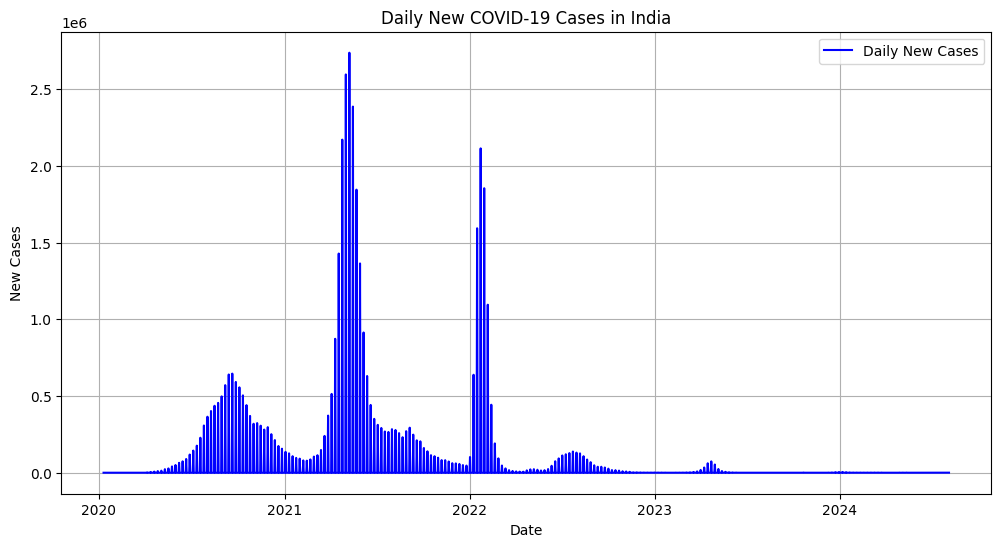

In [3]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot daily new cases
plt.plot(india_df['date'], india_df['new_cases'], label='Daily New Cases', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New COVID-19 Cases in India')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Step 4: Overlay Smoothed Trend Line
We’ll add a 7-day moving average to highlight the overall trend and reduce daily noise.


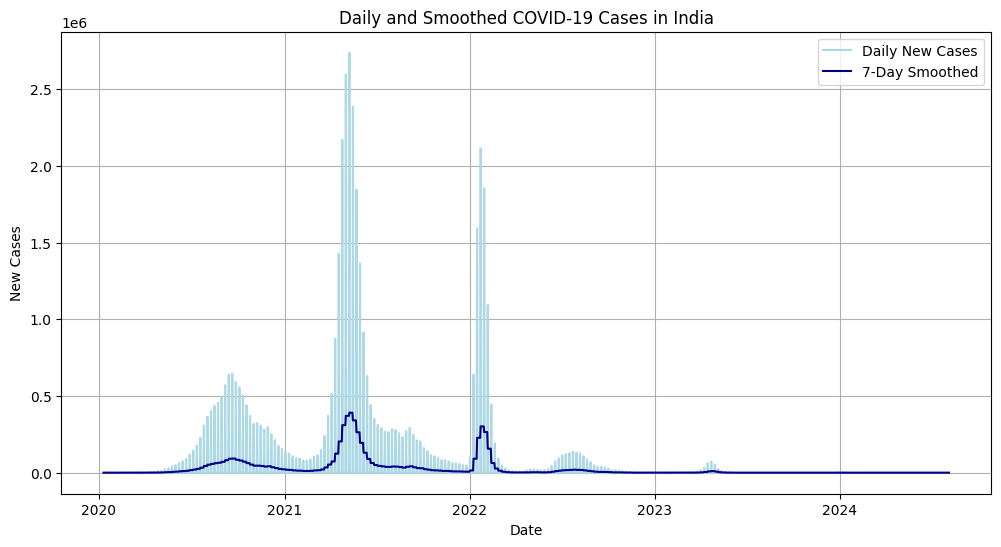

In [4]:
plt.figure(figsize=(12, 6))

# Plot daily new cases
plt.plot(india_df['date'], india_df['new_cases'], label='Daily New Cases', color='lightblue')

# Plot smoothed cases
plt.plot(india_df['date'], india_df['new_cases_smoothed'], label='7-Day Smoothed', color='darkblue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily and Smoothed COVID-19 Cases in India')
plt.legend()
plt.grid(True)

plt.show()


# Step 5: Save the Plot as an Image
We’ll save the visualization as a PNG file for sharing and portfolio use.


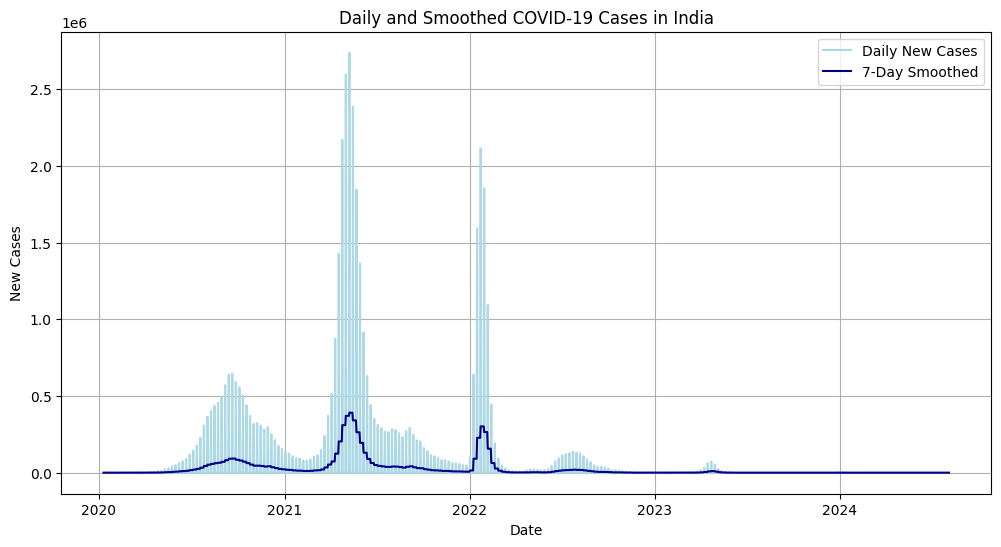

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(india_df['date'], india_df['new_cases'], label='Daily New Cases', color='lightblue')
plt.plot(india_df['date'], india_df['new_cases_smoothed'], label='7-Day Smoothed', color='darkblue')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily and Smoothed COVID-19 Cases in India')
plt.legend()
plt.grid(True)

# Save to file
plt.savefig("covid_trend_plot.png", dpi=300)
plt.show()


# Step 6: Key Insights from the Visualization

 India experienced **three major COVID-19 waves**:
 Early 2021 (first major spike)
 Mid-2021 (Delta wave, highest peak)
 Early 2022 (Omicron wave)

 -->The **7-day smoothed line** helps reveal underlying trends and reduces daily noise.

 --> After early 2022, new cases declined significantly, showing the impact of     
  vaccination and public health measures.

  --> This visualization provides a clear timeline of the pandemic’s progression in        India and can be used to correlate with policy decisions, lockdowns, and vaccine        rollouts.


dd annotations for key events (lockdowns, vaccine rollouts)
Explore state-wise breakdowns for deeper insights
Try basic forecasting using linear regression or Prophet
Publish findings in a blog post or LinkedIn article

==>This notebook is part of my data storytelling portfolio. Feedback and collaboration are welcome!
